#### K-Means Clustering


In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import silhouette_score

In [2]:
import pandas as pd
df = pd.read_csv('Mall_Customers.csv')
df1 = df
df.head(5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df1 = df1.drop(['CustomerID'], axis=1)
df1.head(5)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [4]:
#label encoder
le = LabelEncoder()
df1['Gender'] = le.fit_transform(df['Gender'])

# Selecting relevant features
X = df1[[ 'Annual Income (k$)', 'Spending Score (1-100)']]


In [5]:
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


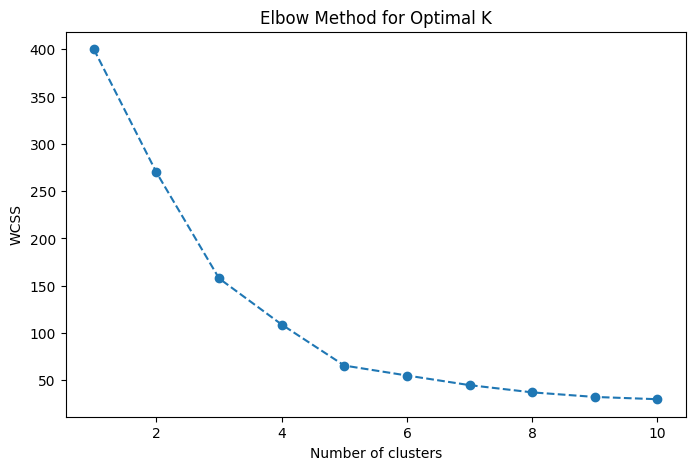

In [6]:
#standerdizing the data 
scaler = StandardScaler()
X_scaled =  scaler.fit_transform(X)

#finding optimal k using Elbow Method
wcss = []
k_values = range(1,11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init = 10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize = (8,5))
plt.plot(k_values, wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

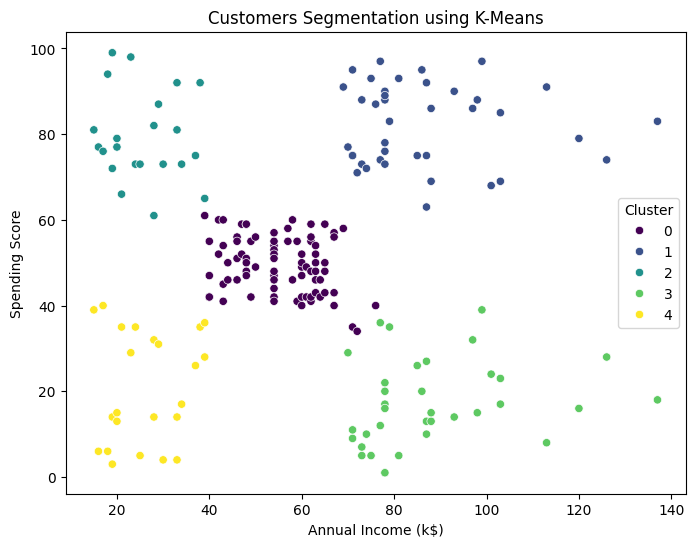

In [7]:
# Applying k-means with k vlaue = 5

kmeans = KMeans (n_clusters = 5, random_state = 42, n_init = 10)
df1['Cluster'] = kmeans.fit_predict(X_scaled)

#Visualizing clusters
plt.figure(figsize=(8, 6))
sns.scatterplot (x=df1['Annual Income (k$)'], y=df1['Spending Score (1-100)'], hue=df1['Cluster'], palette='viridis')
plt.title('Customers Segmentation using K-Means')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.show()


In [8]:
# new sample data point (Annual Income = 50k, Spending Score = 60)
new_sample = np.array([[50,60]])

# Standardizing the new sample using same scaler used for training the data 
new_sample_scaled = scaler.transform(new_sample)

#predicting the cluster
predicted_cluster= kmeans.predict(new_sample_scaled)

print(f"The new customer belongs to Cluster: {predicted_cluster[0]}")


The new customer belongs to Cluster: 0


c:\Users\RICKY\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


#### Evaluation

+ Silhouette Score

In [10]:
silhouette_avg = silhouette_score(X_scaled, df1['Cluster'])
print(f'Silhouette Score: {silhouette_avg:.2f}')

Silhouette Score: 0.55


#### Elbow Method (WCSS)

+ Davies-Bouldin Index (DBI)

In [11]:
from sklearn.metrics import davies_bouldin_score

dbi_index = davies_bouldin_score(X_scaled, df1['Cluster'])
print(f'Davies-Bouldin Index: {dbi_index:.2f}')

Davies-Bouldin Index: 0.57


+ Cluster size distribution

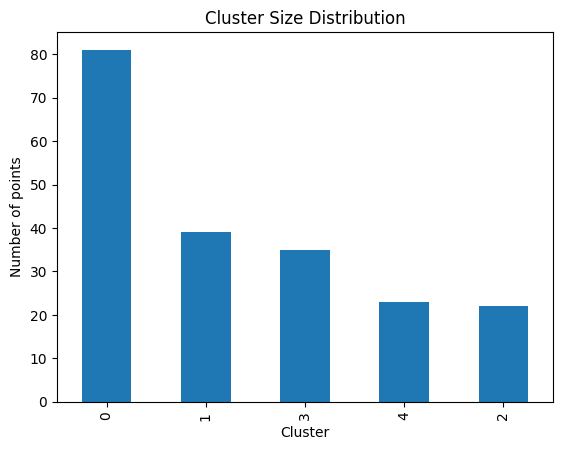

In [12]:
df1['Cluster'].value_counts().plot(kind='bar', title = "Cluster Size Distribution")
plt.xlabel("Cluster")
plt.ylabel("Number of points")
plt.show()